## Context
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.

The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.3

## Dataset Description:
<br>Column descriptions

<br>ID Customer ID

<br>Age Customer's age in completed years

<br>Experience #years of professional experience

<br>Income Annual income of the customer (USD 1000)

<br>ZIPCode Home Address ZIP code.

<br>Family Family size of the customer

<br>CCAvg Avg. spending on credit cards per month (USD 1000)

<br>Education Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

<br>Mortgage Value of house mortgage if any. (USD 1000)

<br>Personal Loan Did this customer accept the personal loan offered in the last campaign?

<br>Securities Account Does the customer have a securities account with the bank?

<br>CD Account Does the customer have a certificate of deposit (CD) account with the bank?

<br>Online Does the customer use internet banking facilities?

<br>CreditCard Does the customer uses a credit card issued by UniversalBank

In [1]:
# import numpy
import numpy as np

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# import train test split from sklearn
from sklearn.model_selection import train_test_split

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read the data
df_loan = pd.read_excel('loan.xlsx', "Data")

# display the first five rows of the data
df_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Q.1 Perform the following tasks

### Change the required data type

In [3]:
# check the data type
df_loan.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

**Change the data type**

In [4]:
df_loan[["Education","Personal Loan","Securities Account",
         "CD Account","Online", "CreditCard"]] = df_loan[["Education","Personal Loan","Securities Account", 
                                                        "CD Account","Online", "CreditCard"]].astype(object)

In [5]:
# check the data type
df_loan.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education              object
Mortgage                int64
Personal Loan          object
Securities Account     object
CD Account             object
Online                 object
CreditCard             object
dtype: object

### Missing Value Analysis

In [6]:
# check missing values
df_loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Summary Statistics**

In [7]:
# check summary statistics
df_loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


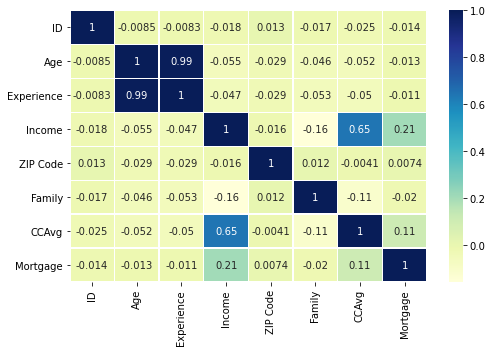

In [44]:
# compute correlation
corr = df_loan.corr()

# create heatmap
# corr: give the correlation matrix
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
ax = sns.heatmap(corr,
                 annot=True,
                 linewidths=0.5,
                 cmap="YlGnBu")

**Income Distribution**

Text(0.5, 1.0, 'Income Distribution')

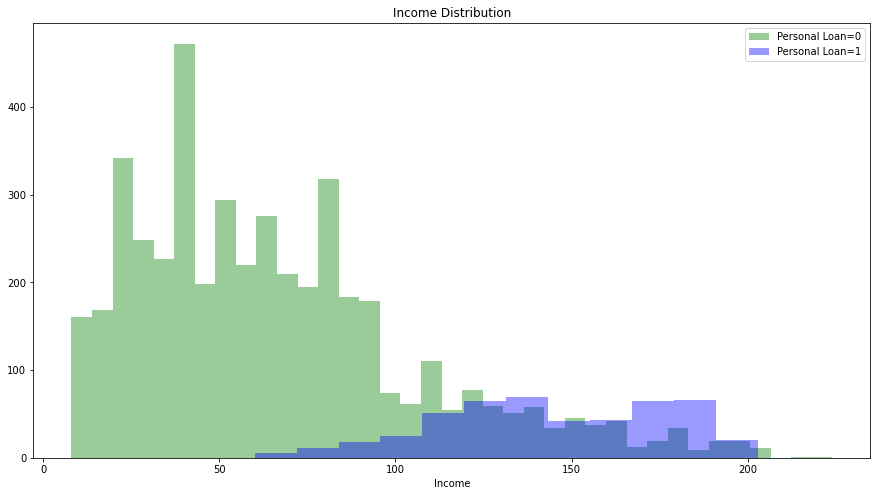

In [49]:
# set figure size
plt.figure(figsize=(15,8))

# create distribution plot
sns.distplot(df_loan[df_loan["Personal Loan"] == 0]['Income'], color = 'g',label='Personal Loan=0',kde=False)
sns.distplot(df_loan[df_loan["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=False)

# add legend
plt.legend()

# add title
plt.title("Income Distribution")

**CCAvg Distribution**

Text(0.5, 1.0, 'CCAvg Distribution')

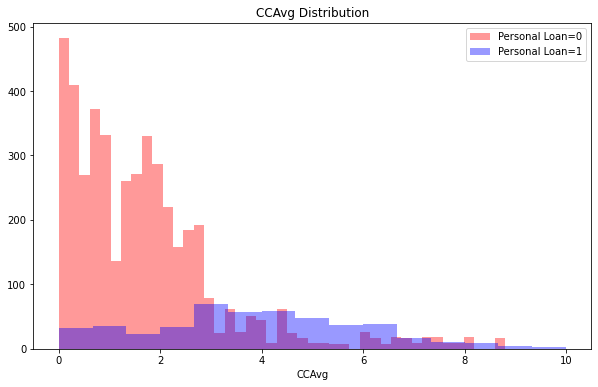

In [50]:
# set figure size
plt.figure(figsize=(10,6))

# create distribution plot
sns.distplot(df_loan[df_loan["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(df_loan[df_loan["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1',kde=False)
# add legend
plt.legend()
# add title
plt.title("CCAvg Distribution")

**Experience distribution**

Text(0.5, 1.0, 'Experience Distribution')

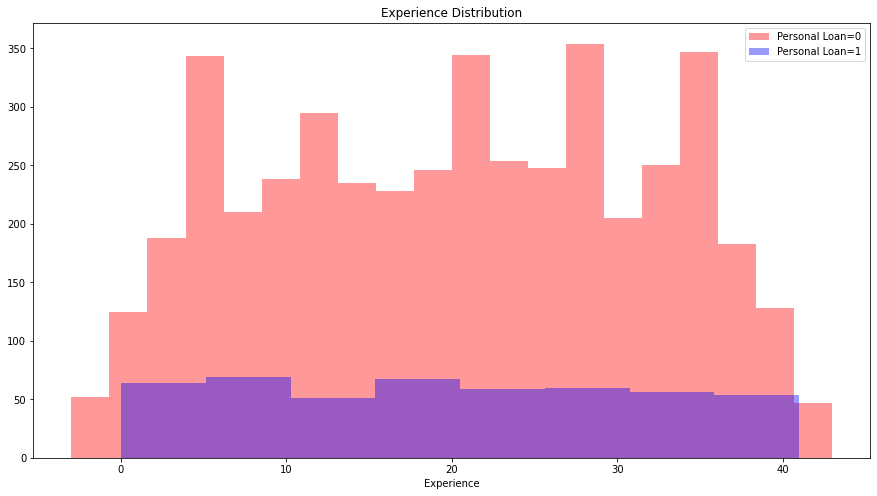

In [52]:
# set figure size
plt.figure(figsize=(15,8))
# create distribution plot
sns.distplot(df_loan[df_loan["Personal Loan"] == 0]['Experience'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(df_loan[df_loan["Personal Loan"] == 1]['Experience'], color = 'b',label='Personal Loan=1',kde=False)
# add legend
plt.legend()
# add title
plt.title("Experience Distribution")

**Securities Account Countplot**

Text(0.5, 1.0, 'Securities Account Countplot')

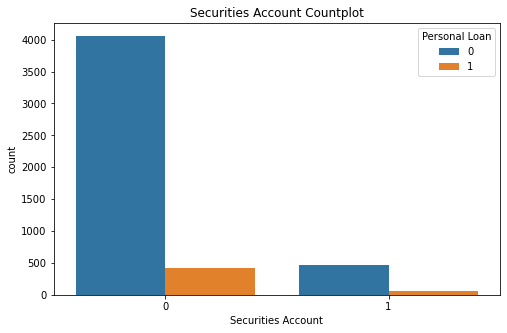

In [53]:
# create count plot
sns.countplot(x='Securities Account',data=df_loan,hue='Personal Loan')
# add title
plt.title("Securities Account Countplot")

**Family countplot**

Text(0.5, 1.0, 'Family Countplot')

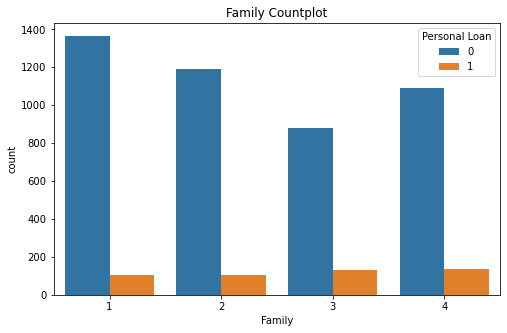

In [55]:
# create count plot
sns.countplot(x='Family',data=df_loan,hue='Personal Loan')
# add title
plt.title("Family Countplot")

Text(0.5, 1.0, 'Education and Income Boxplot')

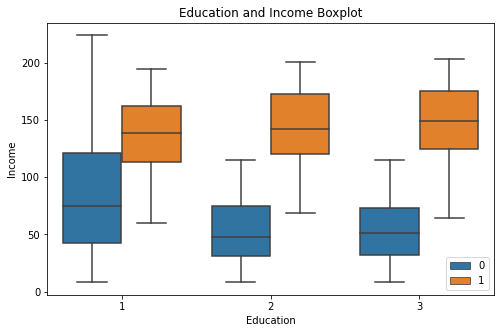

In [56]:
# create boxplot
sns.boxplot(x='Education',data=df_loan,hue='Personal Loan',y='Income')
# add legend
plt.legend(loc='lower right')
# add title
plt.title("Education and Income Boxplot")

## Q2. Build the SVM classifier to identify the potential customers who have higher probability of purchasing the loan. Use hyperparameter tuning using GridSearch CV

In [8]:
# filter the numeric columns
df_num = df_loan.select_dtypes(include=np.number)

# display the first five rows of the data
df_num.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage
0,1,25,1,49,91107,4,1.6,0
1,2,45,19,34,90089,3,1.5,0
2,3,39,15,11,94720,1,1.0,0
3,4,35,9,100,94112,1,2.7,0
4,5,35,8,45,91330,4,1.0,0


In [9]:
# filter the categorical column
df_cat = df_loan.select_dtypes(include=object)

# display the first five rows of the data
df_cat.head()

,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,0,1,0,0,0
1,1,0,1,0,0,0
2,1,0,0,0,0,0
3,2,0,0,0,0,0
4,2,0,0,0,0,1


In [10]:
# drop the target variable from the categorical data
#df_cat = df_cat.drop(['Personal Loan'], axis=1)

In [11]:
# dummy encode the categorical variable
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True)

# display first five rows of the data
df_cat_dummy.head()

,Education_2,Education_3,Personal Loan_1,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1


In [12]:
# concatenate numeric and dummy categorical data
df_dummy = pd.concat([df_num, df_cat_dummy], axis=1)

In [13]:
# display first five rows of the data
df_dummy.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Education_2,Education_3,Personal Loan_1,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,1,25,1,49,91107,4,1.6,0,0,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,0,0,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,1,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,1,0,0,0,0,0,1


In [14]:
# drop unwanted column
df_dummy = df_dummy.drop(["ID","ZIP Code"], axis=1)

In [17]:
# consider the independent variable
X = df_dummy.drop(["Personal Loan_1"], axis=1)

# consider the target variable
y = df_dummy["Personal Loan_1"]

In [18]:
# let us now split the dataset into train & test
# test_size: size of the test data
# random_state: to get the same sample over multiple run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

# print the shape of 'X_train'
print("X_train ",X_train.shape)

# print the shape of 'X_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (3500, 12)
X_test  (1500, 12)
y_train  (3500,)
y_test  (1500,)


In [19]:
# import SVC from sklearn
from sklearn.svm import SVC

# build the model
svclassifier = SVC(kernel='linear')

# fit the model
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
# predict the values
y_pred = svclassifier.predict(X_test)

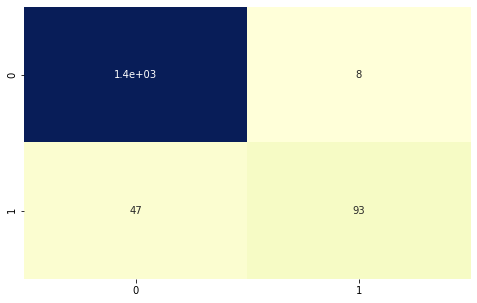

In [25]:
from sklearn.metrics import confusion_matrix

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot a heatmap
sns.heatmap(cm, annot=True,cmap="YlGnBu",cbar=False)

# display the plot
plt.show()

In [26]:
from sklearn.metrics import classification_report

# accuracy measures obtained by classification_report()
result = classification_report(y_test, y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1360
           1       0.92      0.66      0.77       140

    accuracy                           0.96      1500
   macro avg       0.94      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500



In [27]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred)

# print kappa
print('kappa value:',kappa)

kappa value: 0.7524158213792689


**Sensitivity and Specificity**

In [28]:
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9664045746962115
Specificity :  0.9207920792079208


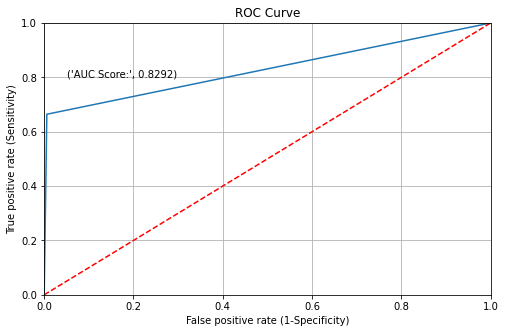

In [29]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes
plt.title('ROC Curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [36]:
from sklearn.model_selection import GridSearchCV 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
svm_grid = GridSearchCV(SVC(), param_grid) 
  
# fitting the model for grid search 
svm_grid.fit(X_train, y_train) 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
# print best parameter after tuning 
print(svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(svm_grid.best_estimator_) 

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [38]:
svm_grid_predictions = svm_grid.predict(X_test)  

## Q3. Check the model performance using the accuracy, auc roc, precision, recall,etc.

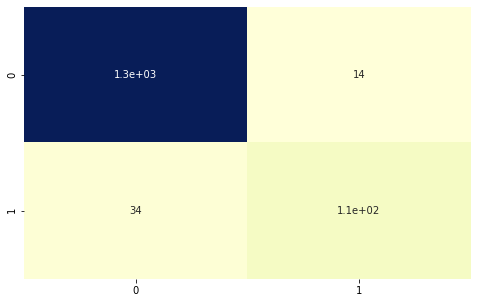

In [39]:
# compute the confusion matrix
cm = confusion_matrix(y_test, svm_grid_predictions)

# plot a heatmap
sns.heatmap(cm, annot=True,cmap="YlGnBu",cbar=False)

# display the plot
plt.show()

In [40]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test, svm_grid_predictions)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1360
           1       0.88      0.76      0.82       140

    accuracy                           0.97      1500
   macro avg       0.93      0.87      0.90      1500
weighted avg       0.97      0.97      0.97      1500



In [41]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, svm_grid_predictions)

# print kappa
print('kappa value:',kappa)

kappa value: 0.797979797979798


In [42]:
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9753623188405797
Specificity :  0.8833333333333333


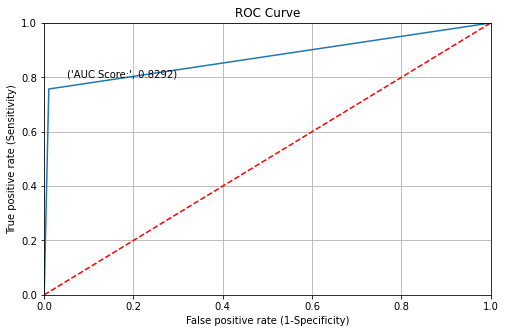

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, svm_grid_predictions)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes
plt.title('ROC Curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)